In [1]:
import arcgis.network as network
import arcgis.geocoding as geocoding

from arcgis.gis import *
from arcgis.geometry import Point
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.features.feature import FeatureSet, Feature


import json
import datetime
import numpy as np
import pandas as pd
from copy import deepcopy
from numpy.linalg import eig
from IPython.display import HTML

import os
username = os.environ['ESRI_USERNAME']
password = os.environ['ESRI_PASSWORD']

my_gis = GIS('https://www.arcgis.com', username, password)

In [2]:
route_service_url = my_gis.properties.helperServices.route.url
route_service_url

'https://route.arcgis.com/arcgis/rest/services/World/Route/NAServer/Route_World'

In [3]:
route_service = network.RouteLayer(route_service_url, gis=my_gis)
route_service

<RouteLayer url:"https://route.arcgis.com/arcgis/rest/services/World/Route/NAServer/Route_World">

In [20]:
str(my_gis.content.search('title: ArcGIS Online Directions and Routing Services Coverage type:Web Map owner:esri',
                      item_type='Web Map', outside_org=True)[0])


'<Item title:"ArcGIS Online Directions and Routing Services Coverage" type:Web Map owner:esri>'

In [19]:
my_gis.content.search('title: ArcGIS Online Directions and Routing Services Coverage type:Web Map owner:esri',
                      item_type='Web Map', outside_org=True)


1

<Item title:"World Traffic Map" type:Web Map owner:esri>
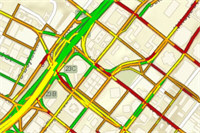

In [5]:
my_gis.content.search('title: World Traffic Map type:Web Map owner:esri',
                      item_type='Web Map', outside_org=True)[0]

In [6]:
route_layer = network.RouteLayer(route_service_url, gis=my_gis)
start_time = int(datetime.datetime.now().timestamp() * 1000)

my_point1 = geocode(address="235 Harrison St, Syracuse, NY 13202", as_featureset=True).features[1].as_dict
my_point2 = geocode(address="5659-crestwood-dr-verona-ny-13478", as_featureset=True).features[0].as_dict

result = route_layer.solve(stops='''%f,%f; %f,%f'''%(my_point1['geometry']['x'], 
                                                     my_point1['geometry']['y'],
                                                     my_point2['geometry']['x'], 
                                                     my_point2['geometry']['y'],
                                                    ),
                           directions_language='en-US', return_routes=False,
                           return_stops=False, return_directions=True,
                           directions_length_units='esriNAUMiles',
                           return_barriers=False, return_polygon_barriers=False,
                           return_polyline_barriers=False, start_time=start_time,
                           start_time_is_utc=True)


records = []
travel_time, time_counter = 0, 0
distance, distance_counter = 0, 0

for i in result['directions'][0]['features']:
    time_of_day = datetime.datetime.fromtimestamp(i['attributes']['arriveTimeUTC'] / 1000).strftime('%H:%M:%S')
    time_counter = i['attributes']['time']
    distance_counter = i['attributes']['length']
    travel_time += time_counter
    distance += distance_counter
    records.append( (time_of_day, i['attributes']['text'], 
                     round(travel_time, 2), round(distance, 2))  )
    
pd.set_option('display.max_colwidth', 100)
df = pd.DataFrame.from_records(records, index=[i for i in range(1, len(records) + 1)], 
                               columns=['Time of day', 'Direction text', 
                                        'Duration (min)', 'Distance (miles)'])
directions = HTML(df.to_html(index=False))
records[-1][2]

40.55

In [7]:
import json
foo = json.loads(df.to_json(orient='index'))
F = []
for bar in foo:
    F += [foo[bar]]
# print(F)
print('Trip took %f minutes.' % F[-1]['Duration (min)'])

Trip took 40.550000 minutes.


In [17]:
F

[{'Direction text': 'Start at Location 1',
  'Distance (miles)': 0.0,
  'Duration (min)': 0.0,
  'Time of day': '00:31:40'},
 {'Direction text': 'Go south on Harrison Pl toward E Adams St',
  'Distance (miles)': 0.0,
  'Duration (min)': 0.04,
  'Time of day': '00:31:40'},
 {'Direction text': 'Turn left on E Adams St',
  'Distance (miles)': 0.4,
  'Duration (min)': 1.33,
  'Time of day': '00:31:43'},
 {'Direction text': 'Turn left on Almond St',
  'Distance (miles)': 0.51,
  'Duration (min)': 1.78,
  'Time of day': '00:33:00'},
 {'Direction text': 'Bear left onto ramp and go on I-81 N toward I-690 W',
  'Distance (miles)': 0.82,
  'Duration (min)': 2.31,
  'Time of day': '00:33:27'},
 {'Direction text': 'Take ramp on the right and go on I-690 E toward E Syracuse',
  'Distance (miles)': 5.3,
  'Duration (min)': 7.34,
  'Time of day': '00:33:59'},
 {'Direction text': 'Take ramp on the left and go on I-481 N toward Thruway / I-90',
  'Distance (miles)': 8.57,
  'Duration (min)': 10.68,
  '

In [2]:
dev_gis = GIS()
dev_gis

In [54]:
result

{'checksum': 'MNe6AclluwE.',
 'directions': [{'features': [{'attributes': {'ETA': 1549466936374,
      'arriveTimeUTC': 1549484936374,
      'length': 0,
      'maneuverType': 'esriDMTDepart',
      'text': 'Start at Location 1',
      'time': 0},
     'compressedGeometry': '+qsjm6-1vvvvtk+145jaft+0+0'},
    {'attributes': {'ETA': 1549466936374,
      'arriveTimeUTC': 1549484936374,
      'length': 0.003863582287751003,
      'maneuverType': 'esriDMTStraight',
      'text': 'Go south on Harrison Pl toward E Adams St',
      'time': 0.03730642565230262},
     'compressedGeometry': '+qsjm6-1vvvvtk+145jaft+4m-1h3'},
    {'attributes': {'ETA': 1549466938612,
      'arriveTimeUTC': 1549484938612,
      'length': 0.397207000780146,
      'maneuverType': 'esriDMTTurnLeft',
      'text': 'Turn left on E Adams St',
      'time': 1.1960350829779398},
     'compressedGeometry': '+qsjm8-1vvvvtm+145j91g+kto-8q+12md-8q+g7u+0+in9+qe+cci+hk+jhn+0+bqu-8q+cci-hk+b9a-8q+cld-hk+b9a+0+c3o-8q+bi5-8q+30u+0+2

In [207]:
# Using this as a demo starting point
tech_garden = geocode(address="235 Harrison St, Syracuse, NY 13202", as_featureset=True)
tech_garden = tech_garden.features[1]
tech_garden.set_value('PlaceName', 'tech_garden')
tech_garden = FeatureSet([tech_garden])
tech_garden.df

,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Addr_type,BldgName,BldgType,Block,City,Country,DisplayX,DisplayY,Distance,District,ExInfo,LangCode,LevelName,LevelType,Loc_name,LongLabel,Match_addr,MetroArea,Nbrhd,OBJECTID,Phone,PlaceName,Place_addr,Postal,PostalExt,Rank,Region,RegionAbbr,Score,Sector,ShortLabel,Side,StAddr,StDir,StName,StPreDir,StPreType,StType,Status,SubAddr,Subregion,Territory,Type,URL,UnitName,UnitType,X,Xmax,Xmin,Y,Ymax,Ymin,Zone,SHAPE
0,,235,199,165,165-199,StreetAddressExt,,,,Syracuse,USA,-76.1501,43.042841,0,,,ENG,,,World,"235 Harrison Pl, Syracuse, NY, 13202, USA","235 Harrison Pl, Syracuse, New York, 13202",,Downtown,2,,tech_garden,"235 Harrison Pl, Syracuse, New York, 13202",13202,,20,New York,NY,97.04,,235 Harrison Pl,R,235 Harrison Pl,,Harrison,,,Pl,M,,Onondaga County,,,,,,-76.1501,-76.1491,-76.1511,43.042841,43.043841,43.041841,,"{'x': -76.15009974491174, 'y': 43.042841208438..."


In [211]:
# this is needed by the solve_vehicle_routing_problem function 
# to define the start and end point
route = {
    'Name': 'demo trip',
    'StartDepotName': 'tech_garden',
    'EndDepotName': 'tech_garden'
}
route = Feature(route)
route = FeatureSet([route])

In [161]:
tech_garden.df

,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Addr_type,BldgName,BldgType,Block,City,Country,DisplayX,DisplayY,Distance,District,ExInfo,LangCode,LevelName,LevelType,Loc_name,LongLabel,Match_addr,MetroArea,Nbrhd,OBJECTID,Phone,PlaceName,Place_addr,Postal,PostalExt,Rank,Region,RegionAbbr,Score,Sector,ShortLabel,Side,StAddr,StDir,StName,StPreDir,StPreType,StType,Status,SubAddr,Subregion,Territory,Type,URL,UnitName,UnitType,X,Xmax,Xmin,Y,Ymax,Ymin,Zone,SHAPE
0,,235,199,165,165-199,StreetAddressExt,,,,Syracuse,USA,-76.1501,43.042841,0,,,ENG,,,World,"235 Harrison Pl, Syracuse, NY, 13202, USA","235 Harrison Pl, Syracuse, New York, 13202",,Downtown,2,,,"235 Harrison Pl, Syracuse, New York, 13202",13202,,20,New York,NY,97.04,,235 Harrison Pl,R,235 Harrison Pl,,Harrison,,,Pl,M,,Onondaga County,,,,,,-76.1501,-76.1491,-76.1511,43.042841,43.043841,43.041841,,"{'x': -76.15009974491174, 'y': 43.042841208438..."


In [377]:
tech_garden.features[0]

{"geometry": {"x": -76.15009974491174, "y": 43.04284120843839, "spatialReference": {"wkid": 4326, "latestWkid": 4326}, "type": "point"}, "attributes": {"Loc_name": "World", "Status": "M", "Score": 97.04, "Match_addr": "235 Harrison Pl, Syracuse, New York, 13202", "LongLabel": "235 Harrison Pl, Syracuse, NY, 13202, USA", "ShortLabel": "235 Harrison Pl", "Addr_type": "StreetAddressExt", "Type": "", "PlaceName": "tech_garden", "Place_addr": "235 Harrison Pl, Syracuse, New York, 13202", "Phone": "", "URL": "", "Rank": 20, "AddBldg": "", "AddNum": "235", "AddNumFrom": "199", "AddNumTo": "165", "AddRange": "165-199", "Side": "R", "StPreDir": "", "StPreType": "", "StName": "Harrison", "StType": "Pl", "StDir": "", "BldgType": "", "BldgName": "", "LevelType": "", "LevelName": "", "UnitType": "", "UnitName": "", "SubAddr": "", "StAddr": "235 Harrison Pl", "Block": "", "Sector": "", "Nbrhd": "Downtown", "District": "", "City": "Syracuse", "MetroArea": "", "Subregion": "Onondaga County", "Region":

In [398]:
map1 = dev_gis.map("canastota, NY", zoomlevel=8)
map1.basemap = "streets"
map1

MapView(basemap='streets', layout=Layout(height='400px', width='100%'), zoom=8.0)

In [447]:
# map1.draw(tech_garden)
for i in range(len(addresses)):
    map1.draw(geocode(addresses[i])[0])
# map1.draw(tech_garden, symbol=tg_symbol)
# map1.draw(tech_garden, symbol=tg_symbol)
# map1.draw(tech_garden, symbol=tg_symbol)

In [446]:
map1.clear_graphics()

In [457]:
addresses = [
    "235 Harrison St, Syracuse, NY 13202",
    "5659-crestwood-dr-verona-ny-13478",
    "7081-verna-dr-canastota-ny-13032",
    "125-cadillac-st-syracuse-ny-13208",
    "1202-schuyler-st-rome-ny-13440"
]
T = [
    ["10/07/2018 10:00 AM", "10/07/2018 09:59 AM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 01:00 PM", "10/07/2018 03:00 PM"], #"Sunday, October 7 1:00 PM to 3:00 PM",
    ["10/07/2018 11:00 AM", "10/07/2018 01:00 PM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 11:00 AM", "10/07/2018 01:00 PM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 01:00 PM", "10/07/2018 02:30 PM"] #"Sunday, October 7 1:00 PM to 2:30 PM"
]
for i in range(len(times)):
    T[i][0] = datetime_object = datetime.datetime.strptime(T[i][0], '%m/%d/%Y %I:%M %p').timestamp()
    T[i][1] = datetime_object = datetime.datetime.strptime(T[i][1], '%m/%d/%Y %I:%M %p').timestamp()

geocoded_addresses = []
for i in range(len(addresses)):
    A = geocode(addresses[i])[0]
    A['ServiceTime'] = 30
    A['StartTime'] = T[i][0]
    A['EndTime'] = T[i][1]
    geocoded_addresses += [A]
geocoded_addresses = FeatureSet.from_dataframe(pd.DataFrame(geocoded_addresses))
print(len(geocoded_addresses.features))
print(geocoded_addresses.features[0])

5
{"attributes": {"EndTime": 1538906340.0, "ServiceTime": 30, "StartTime": 1538906400.0, "address": "235 Harrison St, Syracuse, New York, 13202", "attributes": {"Loc_name": "World", "Status": "M", "Score": 100, "Match_addr": "235 Harrison St, Syracuse, New York, 13202", "LongLabel": "235 Harrison St, Syracuse, NY, 13202, USA", "ShortLabel": "235 Harrison St", "Addr_type": "PointAddress", "Type": "", "PlaceName": "", "Place_addr": "235 Harrison St, Syracuse, New York, 13202", "Phone": "", "URL": "", "Rank": 20, "AddBldg": "", "AddNum": "235", "AddNumFrom": "", "AddNumTo": "", "AddRange": "", "Side": "R", "StPreDir": "", "StPreType": "", "StName": "Harrison", "StType": "St", "StDir": "", "BldgType": "", "BldgName": "", "LevelType": "", "LevelName": "", "UnitType": "", "UnitName": "", "SubAddr": "", "StAddr": "235 Harrison St", "Block": "", "Sector": "", "Nbrhd": "Downtown", "District": "", "City": "Syracuse", "MetroArea": "", "Subregion": "Onondaga County", "Region": "New York", "RegionA

In [539]:
def getRoute(feature1, feature2, get_directions = False):
    route_layer = network.RouteLayer(route_service_url, gis=my_gis)
    start_time = int(datetime.datetime.now().timestamp() * 1000)

    my_point1 = feature1.as_dict
    my_point2 = feature2.as_dict
    
    if get_directions:
        result = route_layer.solve(stops='''%f,%f; %f,%f'''%(my_point1['attributes']['location']['x'], 
                                                             my_point1['attributes']['location']['y'],
                                                             my_point2['attributes']['location']['x'], 
                                                             my_point2['attributes']['location']['y'],
                                                            ),
                                   directions_language='en-US', return_routes=False,
                                   return_stops=False, return_directions=True,
                                   directions_length_units='esriNAUMiles',
                                   return_barriers=False, return_polygon_barriers=False,
                                   return_polyline_barriers=False, start_time=start_time,
                                   start_time_is_utc=True)


        records = []
        travel_time, time_counter = 0, 0
        distance, distance_counter = 0, 0

        for i in result['directions'][0]['features']:
            time_of_day = datetime.datetime.fromtimestamp(i['attributes']['arriveTimeUTC'] / 1000).strftime('%H:%M:%S')
            time_counter = i['attributes']['time']
            distance_counter = i['attributes']['length']
            travel_time += time_counter
            distance += distance_counter
            records.append( (time_of_day, i['attributes']['text'], 
                             travel_time, round(distance, 2))  )

        pd.set_option('display.max_colwidth', 100)
        df = pd.DataFrame.from_records(records, index=[i for i in range(1, len(records) + 1)], 
                                       columns=['Time of day', 'Direction text', 
                                                'Duration (min)', 'Distance (miles)'])
        directions = HTML(df.to_html(index=False))
        return [directions, [records[-1][2]*60, my_point2['attributes']['StartTime'], my_point2['attributes']['EndTime']]]
    else:
        result = route_layer.solve(stops='''%f,%f; %f,%f'''%(my_point1['attributes']['location']['x'], 
                                                             my_point1['attributes']['location']['y'],
                                                             my_point2['attributes']['location']['x'], 
                                                             my_point2['attributes']['location']['y'],
                                                            ), 
                           return_directions=False, return_routes=True, 
                           output_lines='esriNAOutputLineNone', return_barriers=False, 
                           return_polygon_barriers=False, return_polyline_barriers=False)
        return float(result['routes']['features'][0]['attributes']['Total_TravelTime'])






In [453]:
def meets_demand(arrival_time, start_time, end_time):
    return arrival_time <= end_time

In [543]:
print(len(geocoded_addresses.features))
times = []
directions = []
for i in range(len(geocoded_addresses.features)):
    dirs = []
    row_times = []
    for j in range(len(geocoded_addresses.features)):
        d, t = getRoute(geocoded_addresses.features[i], geocoded_addresses.features[j], True)
        row_times += [t]
        dirs += [d]
    directions += [dirs]
    times += [row_times]
#         break
directions = np.array(directions)
times = np.array(times)
print(times)
print(directions)

5
[[[0.00000000e+00 1.53890640e+09 1.53890634e+09]
  [2.52773561e+03 1.53891720e+09 1.53892440e+09]
  [2.08706090e+03 1.53891000e+09 1.53891720e+09]
  [5.94172332e+02 1.53891000e+09 1.53891720e+09]
  [3.25525052e+03 1.53891720e+09 1.53892260e+09]]

 [[2.50873881e+03 1.53890640e+09 1.53890634e+09]
  [0.00000000e+00 1.53891720e+09 1.53892440e+09]
  [1.23878828e+03 1.53891000e+09 1.53891720e+09]
  [2.36288971e+03 1.53891000e+09 1.53891720e+09]
  [1.01095719e+03 1.53891720e+09 1.53892260e+09]]

 [[2.04773864e+03 1.53890640e+09 1.53890634e+09]
  [1.14872237e+03 1.53891720e+09 1.53892440e+09]
  [0.00000000e+00 1.53891000e+09 1.53891720e+09]
  [1.90203683e+03 1.53891000e+09 1.53891720e+09]
  [1.88096089e+03 1.53891720e+09 1.53892260e+09]]

 [[5.56337135e+02 1.53890640e+09 1.53890634e+09]
  [2.28106236e+03 1.53891720e+09 1.53892440e+09]
  [1.84214807e+03 1.53891000e+09 1.53891720e+09]
  [0.00000000e+00 1.53891000e+09 1.53891720e+09]
  [3.00911690e+03 1.53891720e+09 1.53892260e+09]]

 [[3.24581

In [541]:
print(len(geocoded_addresses.features))
times = []
for i in range(len(geocoded_addresses.features)):
    dirs = []
    row_times = []
    for j in range(len(geocoded_addresses.features)):
        t = getRoute(geocoded_addresses.features[i], geocoded_addresses.features[j])
        row_times += [t]
    times += [row_times]
#         break
times = np.array(times)
print(times)

5
[[ 0.         42.17344419 35.60607338  9.89691332 53.79842879]
 [42.26072916  0.         21.46955734 39.8793877  17.15826095]
 [34.7434608  19.57045876  0.         32.36211934 31.19544336]
 [ 9.42484748 38.46882888 31.90145808  0.         50.09381348]
 [53.50643917 16.75302285 32.78727208 51.12509771  0.        ]]


In [616]:
def get_paths(times, current_time, average_time_at_open_house = 60 * 20):
    print(times)

In [617]:
current_time = T[0][0]
dt = datetime.datetime.fromtimestamp(current_time)
print('Leaving home at %s' % dt.strftime('%m/%d/%Y %I:%M %p'))
paths = get_paths(times, current_time, 60*10)

Leaving home at 10/07/2018 10:00 AM
[[[0.00000000e+00 1.53890640e+09 1.53890634e+09]
  [2.52773561e+03 1.53891720e+09 1.53892440e+09]
  [2.08706090e+03 1.53891000e+09 1.53891720e+09]
  [5.94172332e+02 1.53891000e+09 1.53891720e+09]
  [3.25525052e+03 1.53891720e+09 1.53892260e+09]]

 [[2.50873881e+03 1.53890640e+09 1.53890634e+09]
  [0.00000000e+00 1.53891720e+09 1.53892440e+09]
  [1.23878828e+03 1.53891000e+09 1.53891720e+09]
  [2.36288971e+03 1.53891000e+09 1.53891720e+09]
  [1.01095719e+03 1.53891720e+09 1.53892260e+09]]

 [[2.04773864e+03 1.53890640e+09 1.53890634e+09]
  [1.14872237e+03 1.53891720e+09 1.53892440e+09]
  [0.00000000e+00 1.53891000e+09 1.53891720e+09]
  [1.90203683e+03 1.53891000e+09 1.53891720e+09]
  [1.88096089e+03 1.53891720e+09 1.53892260e+09]]

 [[5.56337135e+02 1.53890640e+09 1.53890634e+09]
  [2.28106236e+03 1.53891720e+09 1.53892440e+09]
  [1.84214807e+03 1.53891000e+09 1.53891720e+09]
  [0.00000000e+00 1.53891000e+09 1.53891720e+09]
  [3.00911690e+03 1.5389172

In [480]:
addresses = [
    "235 Harrison St, Syracuse, NY 13202",
    "5659-crestwood-dr-verona-ny-13478",
    "7081-verna-dr-canastota-ny-13032",
    "125-cadillac-st-syracuse-ny-13208",
    "1202-schuyler-st-rome-ny-13440"
]
T = [
    ["10/07/2018 10:00 AM", "10/07/2018 09:59 AM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 01:00 PM", "10/07/2018 03:00 PM"], #"Sunday, October 7 1:00 PM to 3:00 PM",
    ["10/07/2018 11:00 AM", "10/07/2018 01:00 PM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 11:00 AM", "10/07/2018 01:00 PM"], #"Sunday, October 7 11:00 AM to 1:00 PM",
    ["10/07/2018 01:00 PM", "10/07/2018 02:30 PM"] #"Sunday, October 7 1:00 PM to 2:30 PM"
]

LinAlgError: Last 2 dimensions of the array must be square

In [619]:
directions[0][3]

Time of day,Direction text,Duration (min),Distance (miles)
13:24:04,Start at Location 1,0.000000,0.00
13:24:04,Go west on Harrison St toward Harrison Pl,0.002672,0.00
13:24:04,Turn left on Harrison Pl,1.029488,0.11
13:25:06,Turn left on E Adams St,2.536394,0.50
13:26:36,Turn left on Almond St,2.931522,0.62
13:27:00,Bear left onto ramp and go on I-81 N toward I-690 W,5.149134,2.25
13:29:13,At exit 22 bear right onto ramp toward Court St (RT-298),5.408840,2.38
13:29:29,At fork keep left toward Court St (RT-298),5.558594,2.43
13:29:38,Bear left on Sunset Ave,5.804659,2.49
13:29:52,Turn right on Court St (RT-298),9.086662,3.50
